In [1]:
#==================================================#==================================================#==================================================#======================================

#3)Dividir el Costo en función de la importancia de cada una de las caracteristicas: Weight_kg|Distance_miles|Transit_Days

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [2]:
# Cargar dataset
import pandas as pd

df = pd.read_csv("logistics_shipments_dataset.csv", sep=";")
print(df.head())   # para ver las primeras filas
print(df.columns)  # para confirmar columnas


  Shipment_ID Origin_Warehouse    Destination Carrier Shipment_Date  \
0     SH10000    Warehouse_MIA  San Francisco     UPS     2/10/2023   
1     SH10001    Warehouse_MIA        Atlanta     DHL     6/12/2023   
2     SH10002     Warehouse_LA        Houston     DHL     18/9/2023   
3     SH10003    Warehouse_BOS        Seattle  OnTrac     26/1/2023   
4     SH10004     Warehouse_SF         Dallas  OnTrac      3/6/2023   

  Delivery_Date  Weight_kg    Cost     Status  Distance_miles  Transit_Days  
0     4/10/2023       25.7   67.46  Delivered             291             2  
1     9/12/2023       38.9  268.85  Delivered            1225             3  
2     20/9/2023       37.2   74.35  Delivered             220             2  
3      4/2/2023       42.6  187.04  Delivered            1156             9  
4      6/6/2023        7.9  120.01  Delivered            1017             3  
Index(['Shipment_ID', 'Origin_Warehouse', 'Destination', 'Carrier',
       'Shipment_Date', 'Delivery_Dat

In [3]:
# elimina espacios
df.columns = df.columns.str.strip()   
print(df.columns.tolist())

['Shipment_ID', 'Origin_Warehouse', 'Destination', 'Carrier', 'Shipment_Date', 'Delivery_Date', 'Weight_kg', 'Cost', 'Status', 'Distance_miles', 'Transit_Days']


In [4]:
# 🔹 Preprocesamiento
df = df.dropna(subset=["Cost", "Weight_kg", "Distance_miles", "Transit_Days"])


In [5]:
# Crear variable objetivo: caro vs barato (usamos la mediana como corte)
umbral = df["Cost"].median()
df["Clase_Costo"] = df["Cost"].apply(lambda x: "Caro" if x > umbral else "Barato")


In [6]:
# Features y target
X = df[["Weight_kg", "Distance_miles", "Transit_Days"]]
y = df["Clase_Costo"]

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predicciones
y_pred = clf.predict(X_test)

# Evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))


Accuracy: 0.9260204081632653

Reporte de Clasificación:
               precision    recall  f1-score   support

      Barato       0.93      0.92      0.93       199
        Caro       0.92      0.93      0.93       193

    accuracy                           0.93       392
   macro avg       0.93      0.93      0.93       392
weighted avg       0.93      0.93      0.93       392



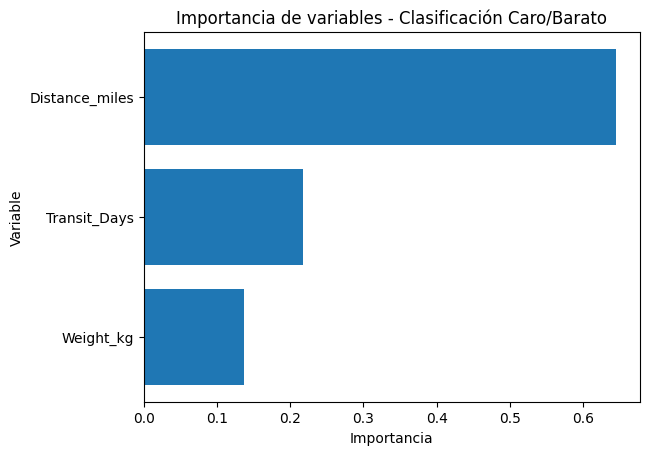

In [7]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# 🔹 Variables
X = df[['Weight_kg', 'Distance_miles', 'Transit_Days']]
y = (df['Cost'] > df['Cost'].median()).astype(int)

# 🔹 Train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔹 Modelo
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# 🔹 Importancia
importancias = clf.feature_importances_
features = X.columns
indices = np.argsort(importancias)

plt.barh([features[i] for i in indices], [importancias[i] for i in indices])
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de variables - Clasificación Caro/Barato")
plt.show()


In [8]:
#El gráfico de importancia te deja explicar qué pesa más en el costo:
#¿El peso del envío?
#¿La distancia recorrida?
#¿Los días de tránsito?

#-  Gráfico 3 – Importancia de las características en la predicción del costo:   
#  El análisis de importancia de variables muestra que  Weight_kg  y  Distance_miles  son los factores más influyentes en la estimación del costo, mientras que  Transit_Days  tiene un peso menor. Esto confirma que el costo depende más de la carga física y la distancia recorrida que del tiempo en tránsito.
